# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [17]:
def gen_exm(num=1000):
    W= [14.0, -3.0]
    b= 1.0
    
    W= np.reshape(W,(2,1) )
    X= np.random.randn(num, 2)
    y=b+np.dot(X,W)+ np.random.randn()
    y=np.reshape(y, (num,1))
    return X,y

In [18]:
X,y=gen_exm()

In [19]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [20]:
print(X[0], y[0])

[0.25532566 0.11309379] [3.18043561]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [15]:
class model:
    def __init__(self, n):
        self.n=n
        self.W=np.random.randn(n,1)
        self.b=np.random.randn()

In [16]:
m = model(2)
print(m.W)
print(m.b)

[[1.34919505]
 [1.44563441]]
-1.3907956050257133


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [36]:
class model(model):
    def f_pass(self, X):
        y_hat=self.b+np.dot(X, self.W)
        return y_hat

In [24]:
y_hat=model(2).f_pass(X)
print(y_hat.shape, y_hat[0])


(1000, 1) [0.96373724]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [27]:
class model(model):
    def com_loss(self, y_hat,y):
        loss=np.sum(np.square(y_hat - y))/(2*y_hat.shape[0])
        return loss

In [34]:
m=model(2)
y_hat=m.f_pass(X)
loss=m.com_loss(y_hat,y)


In [29]:
loss

130.9468508583836

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [30]:
class model(model):
    def b_pass(self, X, y, y_hat):
        m=y.shape[0]
        db=(1/m)*np.sum(y_hat-y)
        dw=(1/m)*np.sum(np.dot(np.transpose(y_hat-y), X), axis=0)
        return dw,db

In [37]:
m=model(2)

X,y=gen_exm(1000)
y_hat=m.f_pass(X)
dw,db=m.b_pass(X,y,y_hat)

In [38]:
print(dw,db)

[-15.74106658   3.27087482] -0.2081087935633269


# Task 7: Update Parameters

In [39]:
class model(model):
    def update_par(self,dw,db,lr):
        self.W=self.W-lr*np.reshape(dw,(self.n,1))
        self.b=self.b-db

# Task 8: Training Loop

In [55]:
class model(model):
    def train(self,X_train, Y_train, it,lr):
        losses=[]
        for i in range(0,it):
            y_hat=self.f_pass(X_train)
            loss=self.com_loss(Y_train,y_hat)
            dw,db=self.b_pass(X_train, Y_train,y_hat)
            self.update_par(dw,db,lr)
            losses.append(loss)
            if(i%int(it/10)==0):
                print("Iter: {}, loss: {:.4f}".format(i,loss))
        return losses

In [56]:
m=model(2)

In [57]:
X_train,Y_train=gen_exm()

In [58]:
losses=m.train(X_train,Y_train,1000, 3e-3)

Iter: 0, loss: 106.0226
Iter: 100, loss: 58.3969
Iter: 200, loss: 32.2041
Iter: 300, loss: 17.7654
Iter: 400, loss: 9.8033
Iter: 500, loss: 5.4113
Iter: 600, loss: 2.9878
Iter: 700, loss: 1.6502
Iter: 800, loss: 0.9116
Iter: 900, loss: 0.5037


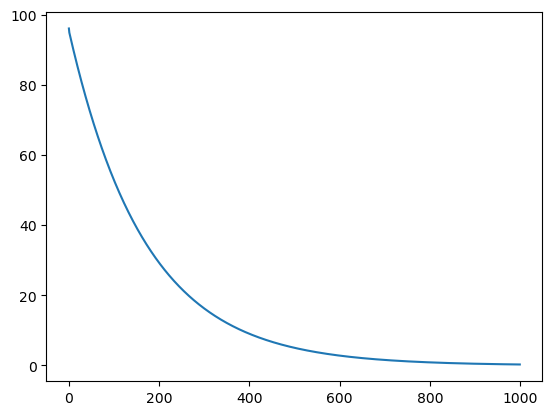

In [49]:
plt.plot(losses);

# Task 9: Predictions

In [65]:
model_untrained=model(2)
x_test, y_test=gen_exm(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [66]:
pre=model_untrained.f_pass(x_test)
p_t=m.f_pass(x_test)

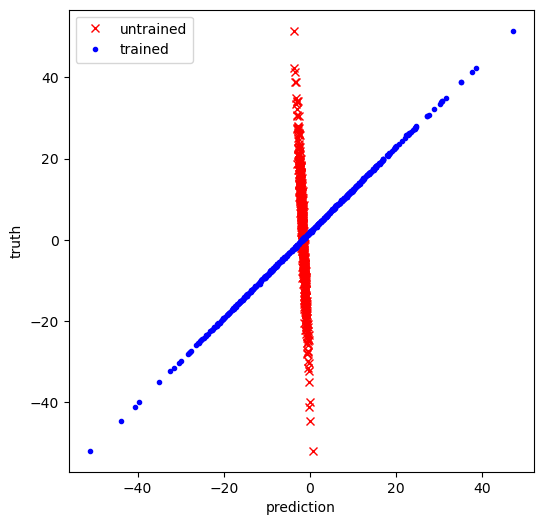

In [67]:
plt.figure(figsize=(6,6))
plt.plot(pre, y_test,'rx', label="untrained")
plt.plot(p_t,y_test,'b.', label="trained")
plt.legend()
plt.xlabel("prediction")
plt.ylabel("truth")
plt.show()